 <h2 style="color:green" align="center">Streaming Data Analytics - Assignments - II</h2>

<h3 style="color:blue">Problem Statement</h3>

Assume that you are working as analyst for “Pizzario”, a pizza delivery chain. The group has collected some interesting characteristics of customers who had purchased their pizza earlier. (Refer the attached pizza_customers.csv file for the same). The marketing team is planning a campaign to increase the sales of a newly launched pizza. Before that they want to analyze the segmentation of existing customers so that they can have the clearer picture about the customer categories.

<h3 style="color:blue">Exercise 1</h3>

## Write a Python program that will take the pizza customers dataset as input and produce the clusters which represents the customer segments present in the dataset. 

Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
import json
import time
warnings.filterwarnings('ignore')

Reading the pizza customers dataset

In [3]:
dataset = pd.read_csv('pizza_customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Exploration of dataset

Describe the dataset

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Shape of the dataset

In [5]:
dataset.shape

(200, 5)

In [6]:
#Looking for null values
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Checking datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Visualization

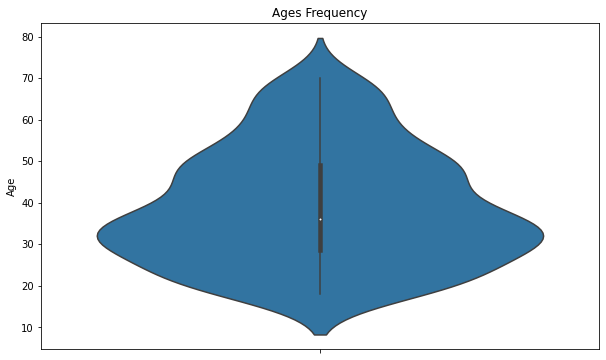

In [8]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=dataset["Age"])
plt.show()

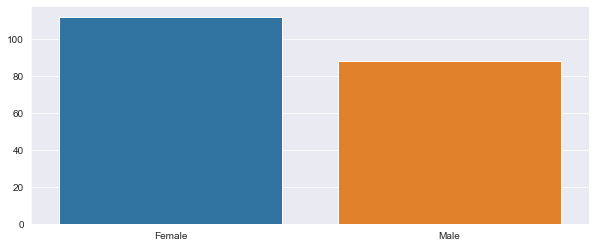

In [9]:
genders = dataset.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

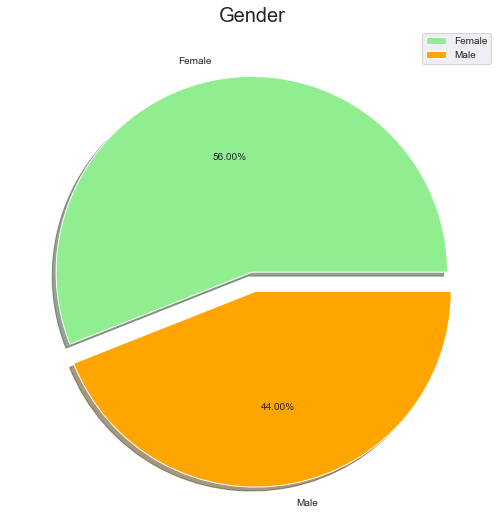

In [10]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Pizzario

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

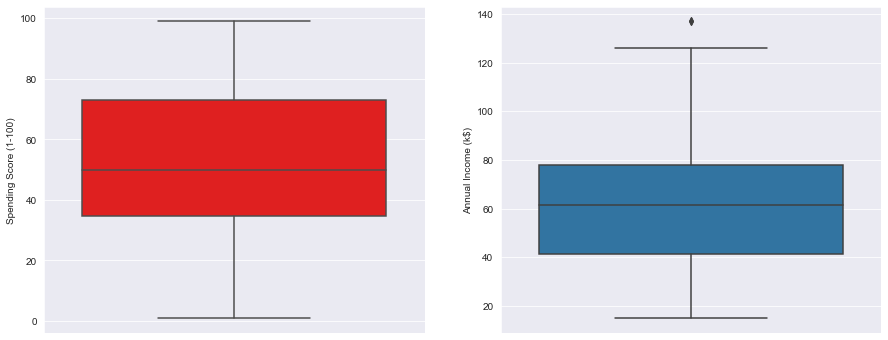

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["Annual Income (k$)"])
plt.show()

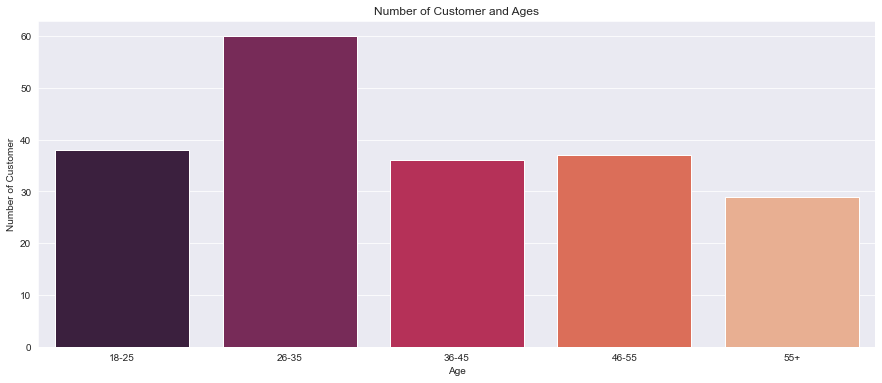

In [12]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

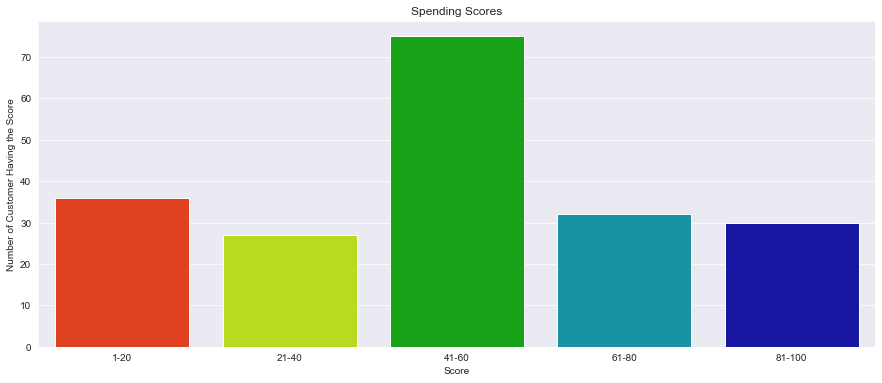

In [13]:
ss1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

This is the Most Important Chart in the perspective of Pizzario, as It is very Important to have some intuition and idea about the Spending Score of the Customers who orders from Pizzario.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 41-60. Interesting there are customers having high spending score also, and 99 Spending score also, which shows that the Pizzario caters to the variety of Customers with varying needs and requirements available in the Pizzario.

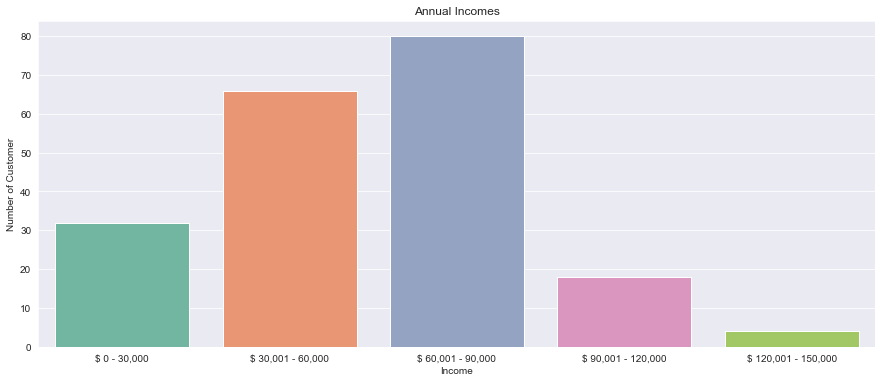

In [14]:
ai0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

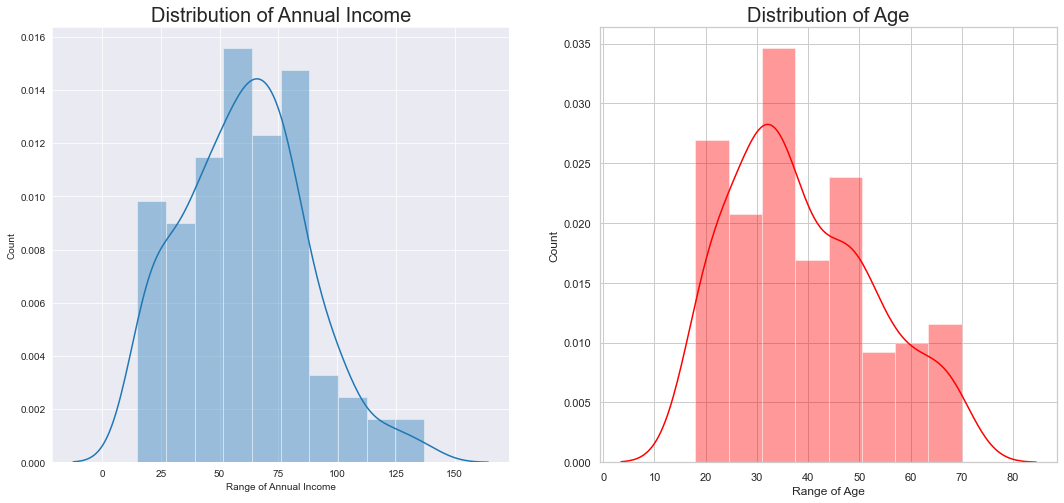

In [15]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Pizzario has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent customers to the Pizzario. Youngsters are lesser in umber as compared to the Middle aged people.

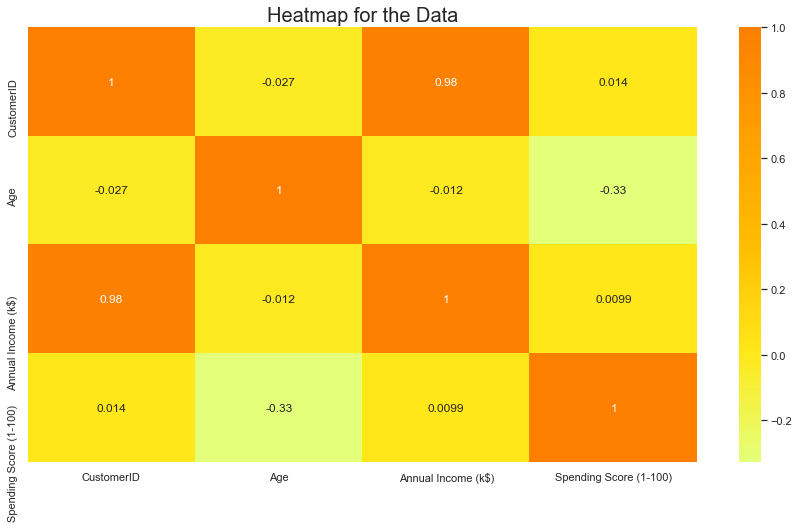

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Pizzario Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

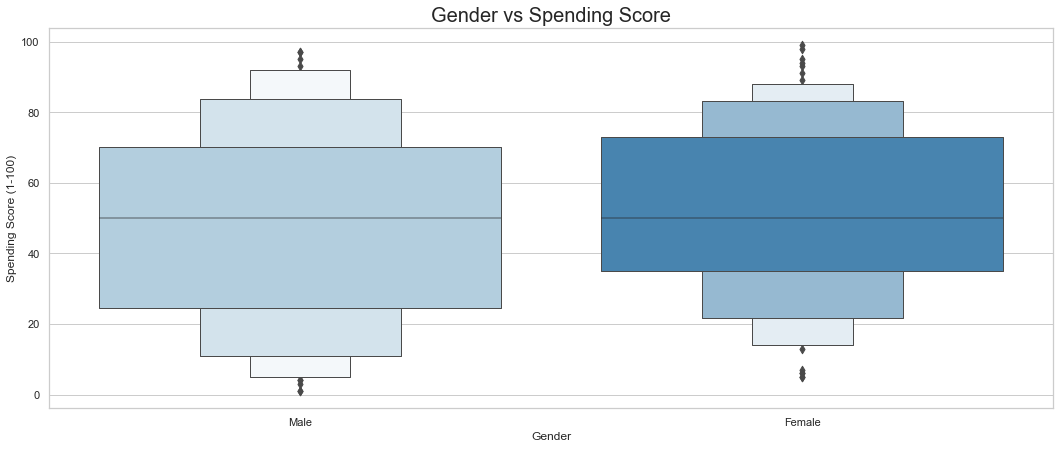

In [17]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(dataset['Gender'], dataset['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Bi-variate Analysis between Gender and Spending Score,

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars, which again points to the fact that women are Purchasing Leaders of Pizzario.

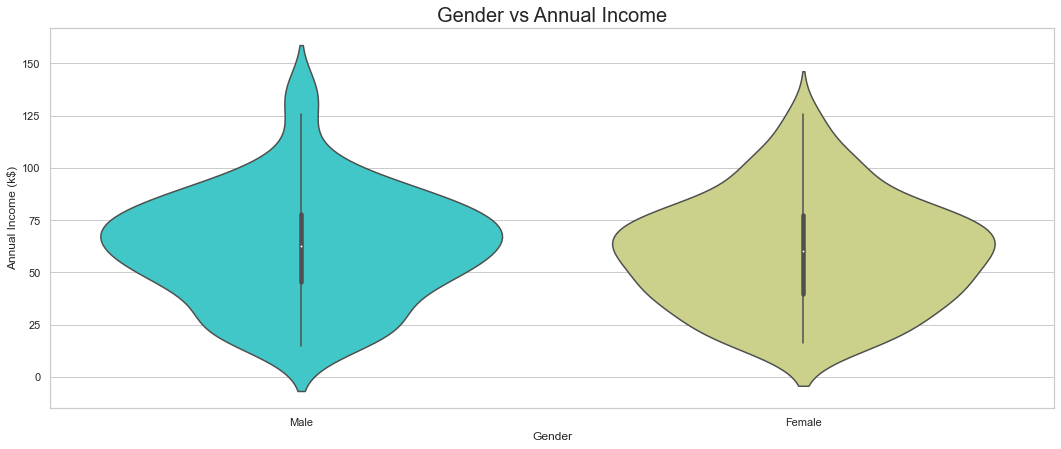

In [18]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(dataset['Gender'], dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

## Preprocessing on the given dataset:

    Applying filtering events

For visualization convenience, we are going to take Annual Income and Spending score as our data.

In [32]:
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

Now X is two matrix of shape (200,2)

Next step is to choose the number of iterations which might guarantee convergence. We need to try many possibilities to find optimum number of iterations required for convergence. There is no need to choose a very large number because say at 100th iteration, if the centroids arrived to their true location or best possible location, even after performing 1000 extra iterations, the algorithm will give same results. So for convenience let’s start by choosing number of iterations as 100.

In [33]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

## The Elbow Method to find the No. of Optimal Clusters

To decide the best value for K (number of clusters):

we use a method called ELBOW method to find the appropriate number of clusters. The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

Steps involved in ELBOW method are:
    
1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.


2. For each K, calculate WCSS


3. Plot the value for WCSS with the number of clusters K.


4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

So let’s implement this

Here we have converted the algorithm into an object-oriented manner. Kmeans is the name of the class, fit method will perform the Kmeans Clustering, and predict will return the Output dictionary and Centroid matrix. 

In [34]:
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [35]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

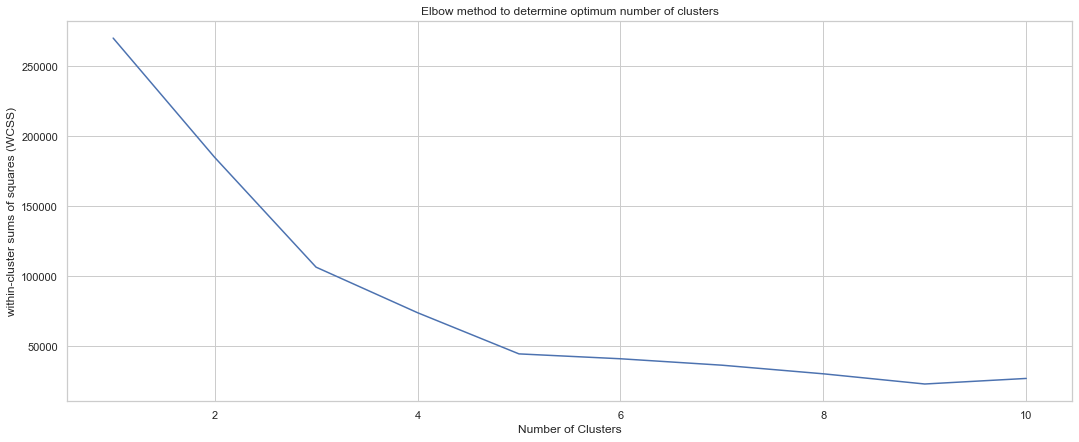

In [36]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

The idea is that we want a small WCSS, but that the WCSS tends to decrease toward 0 as we increase k (the WCSS is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low WCSS, and the elbow usually represents where we start to have diminishing returns by increasing k.

## k means clustering

Based on these observations we choose 5 as optimum number of clusters

In [37]:
K=5 # number of clusters

We are ready to implement our Kmeans Clustering steps. Let’s proceed:

Step 1: Initialize the centroids randomly from the data points:

In [38]:
Centroids=np.array([]).reshape(n,0) 

Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.

In [39]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Step 2:

(a) For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance

(b) We need to regroup the data points based on the cluster index C and store in the Output dictionary and also compute the mean of separated clusters and assign it as new centroids. Y is a temporary dictionary which stores the solution for one particular iteration.

The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values. So let’s initialize the dictionary.

In [40]:
Output={}

We find the euclidian distance from each point to all the centroids and store in a m X K matrix. So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids. Next, we shall find the minimum distance and store the index of the column in a vector C.

Now we need to repeat step 2 till convergence is achieved. In other words, we loop over n_iter and repeat the step 2 (a) and 2 (b) as shown:

In [41]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

Now it’s time to visualize the algorithm and notice how the original data is clustered. To start with, let’s scatter the original unclustered data first.

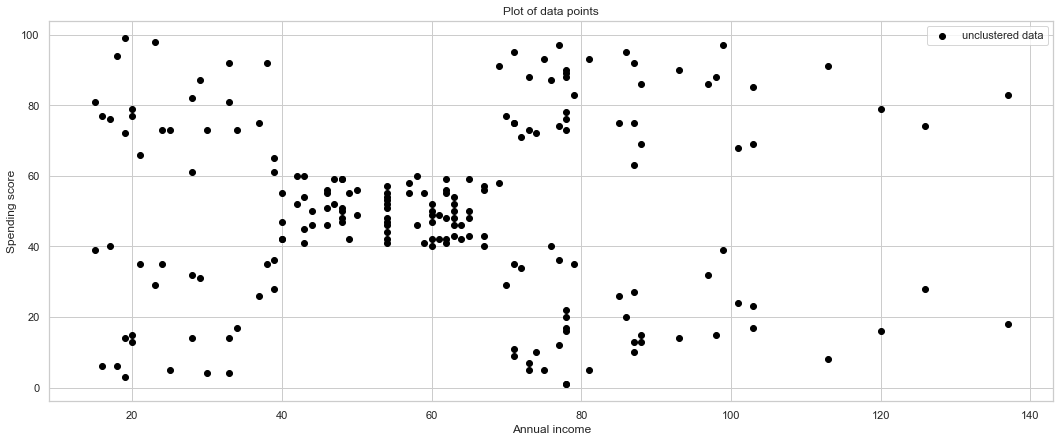

In [42]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.title('Plot of data points')
plt.show()

Now let’s plot the clustered data:

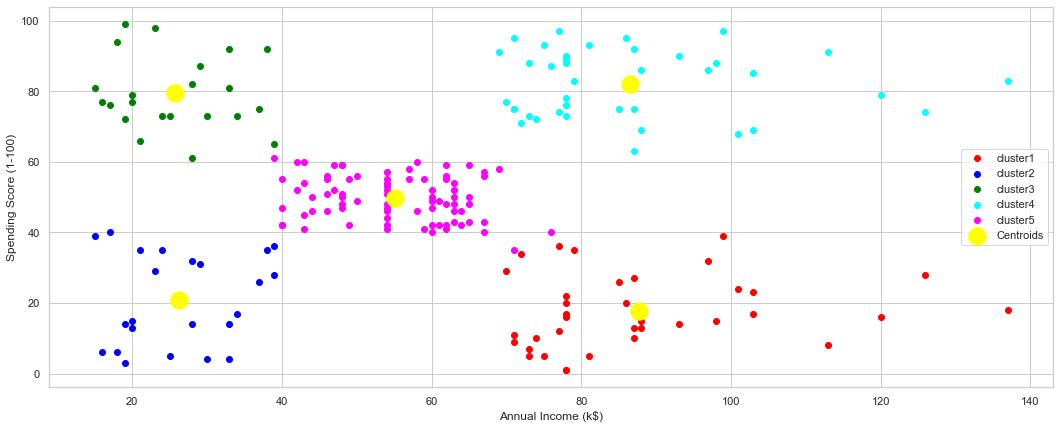

In [43]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Our data has become a clustered data from unclustered raw data. We can observe that there are five categories of clusters which are :

## Inference:

- Cluster 1: Customers with High income and a low spending score: This cluster people have high annual income but spends very little.


- Cluster 2: Customers with low income and a low spending score: Maybe these type of customers are too busy saving their money.


- Cluster 3: Customers with low income but a High spending score: For these type may be the company can recommend products with low price. This cluster contains of by young adults. This cluster has unique behaviour. They have a small annual income but a large spending score. When we’re looking at the age, it consists of very young adults.


- Cluster 4: Customers with High income and a High spending score: This cluster consists of middle-age adults.


- Cluster 5: Customers with medium income and a medium spending score: This cluster is filled by Old-aged adults.



As an analyst, I’d suggest the Pizzario Marketing team to give extra special treatment to cluster 3 and 4 customers.So they keep remain loyal to our Pizzario. The spending score of cluster 1 and 2 is very small, then the cluster should be given a discount in order to increase its spending score.

So the Pizzario company can divide their customers into 5 classes and design different strategies for a different type of customers to increase their sales.

In [43]:
for k in range(K):
    print(f"\nCluster: {k + 1}")
    print(f"\nCentroid Point: {round(Centroids[0,k],2)},{round(Centroids[1,k],2)}")
    print(f"\nTotal number of records belonging to that cluster: {len(Output[k+1][:,0])}")
    print("\n----------------------------------------------------------------------")


Cluster: 1

Centroid Point: 55.09,49.71

Total number of records belonging to that cluster: 80

----------------------------------------------------------------------

Cluster: 2

Centroid Point: 87.75,17.58

Total number of records belonging to that cluster: 36

----------------------------------------------------------------------

Cluster: 3

Centroid Point: 26.3,20.91

Total number of records belonging to that cluster: 23

----------------------------------------------------------------------

Cluster: 4

Centroid Point: 86.54,82.13

Total number of records belonging to that cluster: 39

----------------------------------------------------------------------

Cluster: 5

Centroid Point: 25.73,79.36

Total number of records belonging to that cluster: 22

----------------------------------------------------------------------


So, we used K-Means clustering to understand customer data. K-Means is a good clustering algorithm. Almost all the clusters have similar density. It is also fast and efficient in terms of computational cost.

Now the marketing team is aware about the spending behavior of your customers. 

As a marketing professional we have to think of marketing strategy to attract these customers to newly launched pizza. 

<h3 style="color:blue">Exercise 2</h3>

As an outcome of Exercise 1,we obtaind clusters for the given dataset. 

## Apply appropriate labels to those clusters after careful look at the points belonging to those clusters. 

In [49]:
labels = ['Miser', 'Careful', 'Spendthrift', 'Target', 'General']

for c in range(K):
    print(f"Cluster: {c + 1}")
    print(f"Length of the cluster: {len(Output[c+1][:,0])}")
    for k in range(len(Output[c+1][:,0])):
        for ind in dataset.index:
            if (Output[c+1][k,0] == dataset["Annual Income (k$)"][ind]) and (Output[c+1][k,1] == dataset["Spending Score (1-100)"][ind]):
                print(f"Assigning label to the data point {k + 1} as {labels[c]}")
                dataset.at[ind, 'label'] = ''
                dataset["label"][ind] = labels[c]
    print("\n-----------------------------------------------")

Cluster: 1
Length of the cluster: 36
Assigning label to the data point 1 as Miser
Assigning label to the data point 2 as Miser
Assigning label to the data point 3 as Miser
Assigning label to the data point 4 as Miser
Assigning label to the data point 5 as Miser
Assigning label to the data point 6 as Miser
Assigning label to the data point 7 as Miser
Assigning label to the data point 8 as Miser
Assigning label to the data point 9 as Miser
Assigning label to the data point 10 as Miser
Assigning label to the data point 11 as Miser
Assigning label to the data point 12 as Miser
Assigning label to the data point 13 as Miser
Assigning label to the data point 14 as Miser
Assigning label to the data point 15 as Miser
Assigning label to the data point 15 as Miser
Assigning label to the data point 16 as Miser
Assigning label to the data point 16 as Miser
Assigning label to the data point 17 as Miser
Assigning label to the data point 18 as Miser
Assigning label to the data point 19 as Miser
Assign

## Explain your logic behind nomenclature of the clusters. Show the sample dataset.  

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Pizzario. 

There are clearly Five segments of Customers namely General (Cluster 1), Spendthrift (Cluster 2), Target (Cluster 3), Miser (Cluster 4), and Careful (Cluster 5) based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Pizzario.

<h5 style="color:green">

- For Cluster 1: Customers with medium income and a medium spending score: This set of customers falls under General category as these customers earn medium income and spent the money medium.


- Cluster 2: Customers with low income but a High spending score: This set of customers falls under Spendthrift category as these customers are who spends money in an extravagant, irresponsible way even though they earn low income.


- Cluster 3: Customers with High income and a High spending score: This set of customers falls under Target category as these customers earn high and spends high. These customers requires special treatment and they remain loyal to pizzario.


- Cluster 4: Customers with High income and a low spending score: This set of customers falls under Miser category as these customers earn high and spend low. These persons are who hoards wealth and spends as little money as possible. They tend to save money instead of spending.


- Cluster 5: Customers with low income and a low spending score: his set of customers falls under Careful category as these customers earn low and spend low. They will be very careful in spending the money. 


</h5>

In [50]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,Careful
1,2,Male,21,15,81,Spendthrift
2,3,Female,20,16,6,Careful
3,4,Female,23,16,77,Spendthrift
4,5,Female,31,17,40,Careful


In [46]:
# saving the dataframe
dataset.to_csv('pizza_customers_updated.csv')

## Based on this segmentation, think of some marketing offers that can be given to the customers. 

## Briefly explain the logic behind the offers to be made to the various customer categories.

KMeans Clustering is a powerful technique in order to achieve a decent customer segmentation. Customer segmentation is a good way to understand the behaviour of different customers and plan a good marketing strategy accordingly.
There isn't much difference between the spending score of women and men, which leads us to think that our behaviour when it comes to purchase of pizza is pretty similar.


Observing the clustering graphic, it can be clearly observed that the ones who spend more money in pizzario are young people. That is to say they are the main target when it comes to marketing, so doing deeper studies about what they are interested in may lead to higher profits.

Althought younglings seem to be the ones spending the most, we can't forget there are more people we have to consider, like people who belong to the cluster 1, they are what we would commonly name after "middle class" and it seems to be the biggest cluster.

Promoting discounts on some pizza can be something of interest to those who don't actually spend a lot and they may end up spending more!

<h5 style="color:green">
    
- For Cluster 1: Customers with medium income and a medium spending score: General category 
Customers with medium income and a medium spending score: This cluster is filled by Old-aged adults.
    
Marketing strategy: Pure royalty programs (these segments want them to be valued more than the product/service)
Cashback and gift back programs (like G-pay scratch cards) and rare discounts up to 25%.
    
Discount: 30%
    


- Cluster 2: Customers with low income but a high spending score: Spendthrift category 
For this type may be the company can recommend products with low price. This cluster contains of by young adults. This cluster has unique behaviour. They have a small annual income but a large spending score. When we’re looking at the age, it consists of very young adults.
    
Marketing Strategy: Mid-range Coupons (to make them returning customer)
Give discount coupons worth 10-15% with a safe cap for next orders
    
Discount: 25%

    

- Cluster 3: Customers with High income and a high spending score: Target category 
Customers with High income and a high spending score: This cluster consists of middle-aged adults.
Marketing strategy: Royalty programs and low range coupons. Give discount coupons worth 5-10% for next orders
Discount: 10%

    

- Cluster 4: Customers with High income and a low spending score: Miser category 
Customers with High income and a low spending score: This cluster people have high annual income but spends very little.
    
Marketing strategy: Coupons and Discounts (Targeted Advertisements makes these customers returning)
    
Discount: 20%


    
- Cluster 5: Customers with low income and a low spending score:  Careful category 
Customers with low income and a low spending score: Maybe these types of customers are too busy saving their money.
    
Marketing strategy: Initial Heavy discounts followed by royalty programs (to make them use the product/service and understand the value and make them returning customers).
    
Discount: 15% 
    
 
</h5>

We are well aware about your existing customer base. We know the customers spending habit, we have decided upon offers to be made, now it’s time to test it out for the existing customers.  

Let’s assume that they frequently visits the mall where your pizza shop is located. For this purpose you have to have the mechanisms through which their visits to the mall are captured.

<h3 style="color:blue">Exercise 3</h3>

To write a Python program that will simulate the movement of existing customers around a mall in near real time fashion. 


You can assume that customer’s cell phones are enabling the transfer of location data to your centralized server where it’s stored for further analysis. 

With access to the real time movements of customers around mall, you are feeling more powerful and ready to target these customers. Your accumulated knowledge of streaming data processing and analytics can be leveraged for the same purpose. Now think for an architecture to bring it to the reality through a streaming data pipeline.

<h5 style="color:green">
    The python program should generate the customer ID with timestamp, Latitude and Longitude of visiting the mall.This should be a random generation of customers. This has to be connected to ingestion part of streaming system by using kafka.

    A simple python program to mimic the movement of the customers to the mall.

    Implemented in the kafka_producer.py file.
</h5>

<h3 style="color:blue">Exercise 4</h3>

Construct a streaming data pipeline integrating the various technologies, tools and Programmes covered in the course that will harvest this real time data of customer’s movements and produces the offers that can be sent on the customers mobile devices. You can think of various aspects related to streaming data processing such as: 

    •	Real time streaming data ingestion

    •	Data’s intermittent storage

    •	Data preprocessing – cleaning, transformations etc. 

    •	Data processing – filters, joins, windows etc. 

    •	Business logic for placing the offers

    •	Final representation of the outcome


<h5 style="color:green">

Implemented in the spark_streaming.py file.
    
To implement this, we have use spark streams. We have to fed the output of Exercise 3 into Streaming system (Exercise 4) and output will be marketing offers (Discounts). For simplicity, assume kafka topic for offers. Dump the customer movement data into one kafka topic. The streaming system will be collecting the data - Real time ingestion. Data prepossing is done to convert it into the required format. The output will be the discount offers. This is passed to the kafka consumer.
    
</h5>

### Documentation file: Streaming_Data_Analytics_Assignment.pdf

### Demo video: https://drive.google.com/file/d/1CG1Y67LDJHXPTeGVjKsv03Jpjq1yoVjD/view?usp=sharing